# Data Analysis

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["font.sans-serif"] = [
    "Arial Unicode Ms",
    "Apple Braille",
    "AppleMyungjo",
]

In [13]:
# Read the data from the CSV file
df_weekend = pd.read_csv('data/weekend_data.csv')
df_weekday = pd.read_csv('data/weekday_data.csv')

## 1. Basic Information

In [14]:
# basic info
df_weekend.head()

,on_stop_id,off_stop_id,on_stop,off_stop,sum_of_txn_times,district_origin,district_destination,width,distance,on_stop_coordinates,off_stop_coordinates,txn_times_per_day
0,U101001,U101001,捷運科技大樓站,捷運科技大樓站,139,大安區,大安區,2.415,0.000,"[121.5436, 25.02605]","[121.5436, 25.02605]",69.500
1,U101001,U101002,捷運科技大樓站,復興南路二段273號前,47,大安區,大安區,1.472,0.024,"[121.5436, 25.02605]","[121.54357, 25.02565]",23.500
2,U101001,U101003,捷運科技大樓站,國北教大實小東側門,24,大安區,大安區,1.236,0.282,"[121.5436, 25.02605]","[121.54124, 25.02429]",12.000
3,U101001,U101004,捷運科技大樓站,和平公園東側,121,大安區,大安區,2.231,0.171,"[121.5436, 25.02605]","[121.54282, 25.02351]",60.500
4,U101001,U101005,捷運科技大樓站,辛亥復興路口西北側,185,大安區,大安區,2.887,0.272,"[121.5436, 25.02605]","[121.54299, 25.02153]",92.500


In [15]:
df_weekday.head()

,on_stop_id,off_stop_id,on_stop,off_stop,sum_of_txn_times,district_origin,district_destination,width,distance,on_stop_coordinates,off_stop_coordinates,txn_times_per_day
0,U101001,U101001,捷運科技大樓站,捷運科技大樓站,332,大安區,大安區,2.393,0.000,"[121.5436, 25.02605]","[121.5436, 25.02605]",66.400
1,U101001,U101002,捷運科技大樓站,復興南路二段273號前,109,大安區,大安區,1.454,0.024,"[121.5436, 25.02605]","[121.54357, 25.02565]",21.800
2,U101001,U101003,捷運科技大樓站,國北教大實小東側門,98,大安區,大安區,1.408,0.282,"[121.5436, 25.02605]","[121.54124, 25.02429]",19.600
3,U101001,U101004,捷運科技大樓站,和平公園東側,345,大安區,大安區,2.448,0.171,"[121.5436, 25.02605]","[121.54282, 25.02351]",69.000
4,U101001,U101005,捷運科技大樓站,辛亥復興路口西北側,1028,大安區,大安區,5.322,0.272,"[121.5436, 25.02605]","[121.54299, 25.02153]",205.600


In [16]:
df_weekend.describe()

,sum_of_txn_times,width,distance,txn_times_per_day
count,187182.000,187182.000,187182.000,187182.000
mean,5.905,1.050,2.088,2.953
std,19.452,0.200,2.035,9.726
min,1.000,1.000,0.000,0.500
25%,1.000,1.000,0.852,0.500
50%,2.000,1.010,1.498,1.000
75%,4.000,1.031,2.605,2.000
max,1366.000,15.000,28.797,683.000


In [17]:
df_weekday.describe()

,sum_of_txn_times,width,distance,txn_times_per_day
count,261134.000,261134.000,261134.000,261134.000
mean,11.011,1.042,2.201,2.202
std,46.998,0.198,1.934,9.400
min,1.000,1.000,0.000,0.200
25%,1.000,1.000,0.968,0.200
50%,2.000,1.004,1.671,0.400
75%,7.000,1.025,2.800,1.400
max,3328.000,15.000,32.654,665.600


Text(0.5, 0, '交易次數')

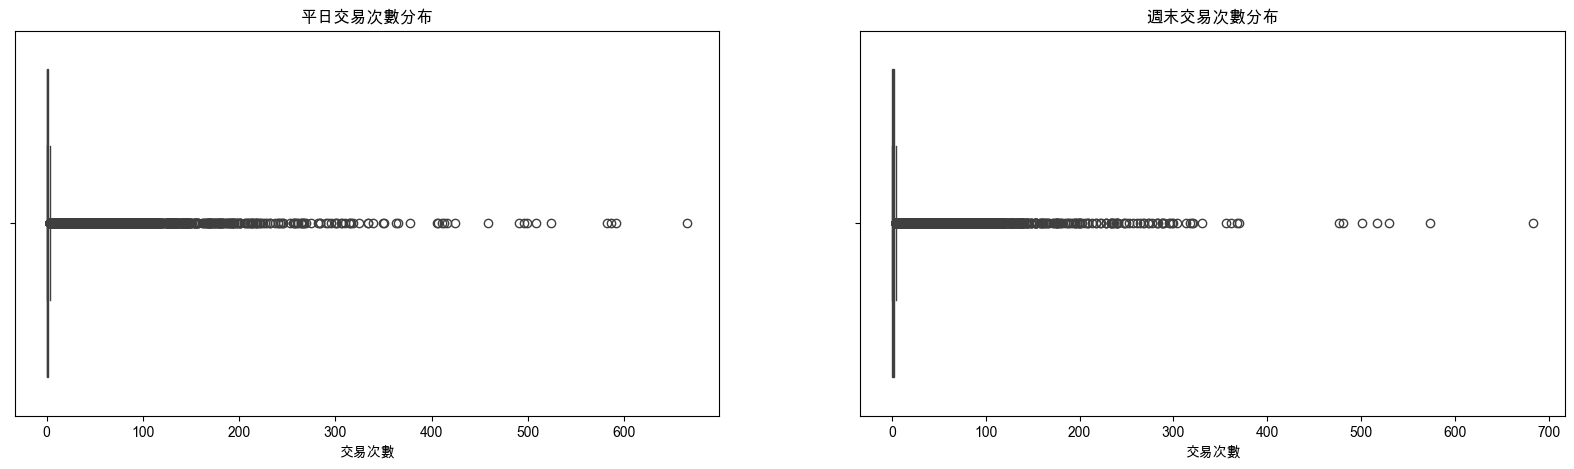

In [18]:
# 透過箱型圖觀察平日與週末的交易次數分布

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df_weekday, x="txn_times_per_day", ax=ax1)
ax1.set_title("平日交易次數分布")
ax1.set_xlabel("交易次數")

sns.boxplot(data=df_weekend, x="txn_times_per_day", ax=ax2)
ax2.set_title("週末交易次數分布")
ax2.set_xlabel("交易次數")


## 2. Visualization

### 前十熱門站點 

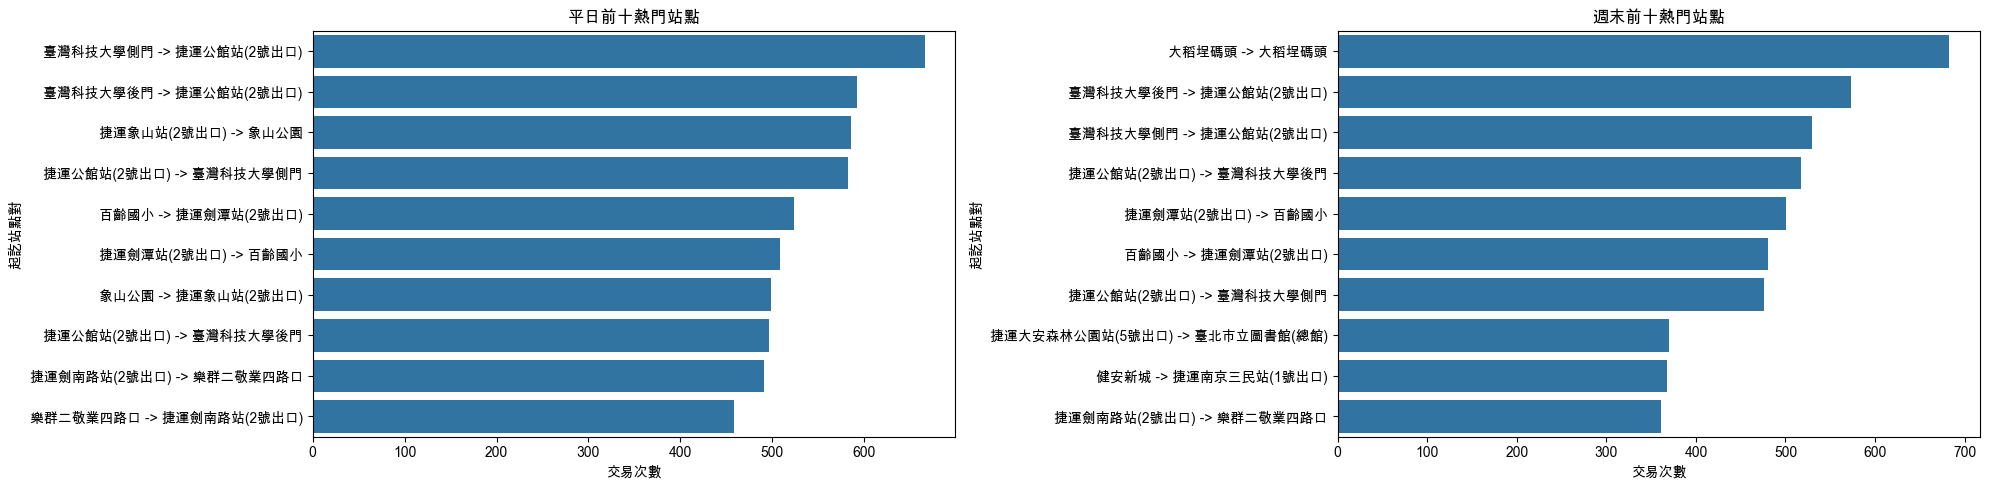

In [19]:
grouped_weekday = df_weekday.groupby(["on_stop", "off_stop"])["txn_times_per_day"].sum()
top_routes_weekday = grouped_weekday.nlargest(10).reset_index()

grouped_weekend = df_weekend.groupby(["on_stop", "off_stop"])["txn_times_per_day"].sum()
top_routes_weekend = grouped_weekend.nlargest(10).reset_index()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(
    data=top_routes_weekday,
    x="txn_times_per_day",
    y=top_routes_weekday.index,
    orient="h",
    ax=ax1,
)
ax1.set_title("平日前十熱門站點")
ax1.set_xlabel("交易次數")
ax1.set_ylabel("起訖站點對")
ax1.set_yticks(np.arange(len(top_routes_weekday.index)))
ax1.set_yticklabels(
    [
        f"{x[0]} -> {x[1]}"
        for x in zip(top_routes_weekday["on_stop"], top_routes_weekday["off_stop"])
    ]
)

sns.barplot(
    data=top_routes_weekend,
    x="txn_times_per_day",
    y=top_routes_weekend.index,
    orient="h",
    ax=ax2,
)
ax2.set_title("週末前十熱門站點")
ax2.set_xlabel("交易次數")
ax2.set_ylabel("起訖站點對")
ax2.set_yticks(np.arange(len(top_routes_weekend.index)))
ax2.set_yticklabels(
    [
        f"{x[0]} -> {x[1]}"
        for x in zip(top_routes_weekend["on_stop"], top_routes_weekend["off_stop"])
    ]
)

# 調整子圖之間的間距
plt.tight_layout()
plt.show()

### 跨行政區的流動

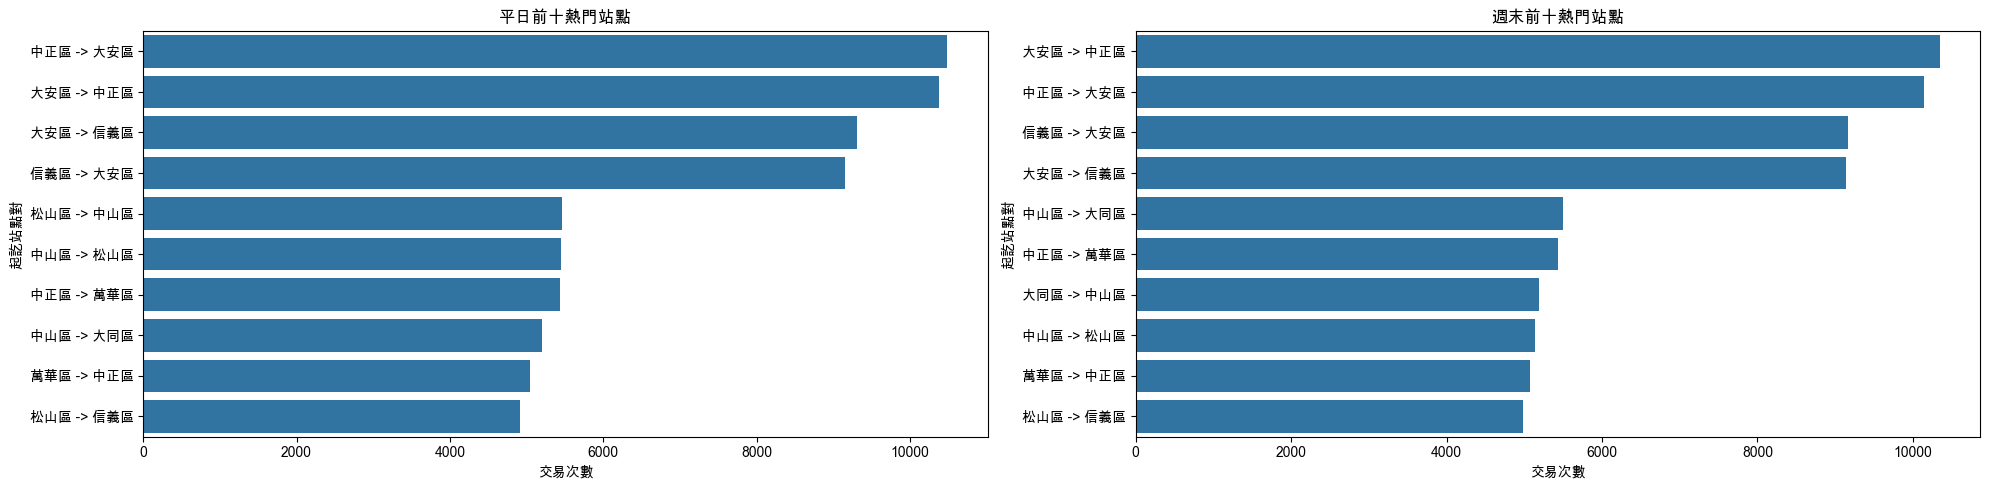

In [20]:
cross_district_flow_weekday = df_weekday[df_weekday["district_origin"] != df_weekday["district_destination"]]
top_routes_weekday = cross_district_flow_weekday.groupby(["district_origin", "district_destination"])["txn_times_per_day"].sum().nlargest(10).reset_index()

cross_district_flow_weekend = df_weekend[df_weekend["district_origin"] != df_weekend["district_destination"]]
top_routes_weekend = cross_district_flow_weekend.groupby(["district_origin", "district_destination"])["txn_times_per_day"].sum().nlargest(10).reset_index()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(
    data=top_routes_weekday,
    x="txn_times_per_day",
    y=top_routes_weekday.index,
    orient="h",
    ax=ax1,
)
ax1.set_title("平日前十熱門站點")
ax1.set_xlabel("交易次數")
ax1.set_ylabel("起訖站點對")
ax1.set_yticks(np.arange(len(top_routes_weekday.index)))
ax1.set_yticklabels(
    [
        f"{x[0]} -> {x[1]}"
        for x in zip(top_routes_weekday["district_origin"], top_routes_weekday["district_destination"])
    ]
)

sns.barplot(
    data=top_routes_weekend,
    x="txn_times_per_day",
    y=top_routes_weekend.index,
    orient="h",
    ax=ax2,
)
ax2.set_title("週末前十熱門站點")
ax2.set_xlabel("交易次數")
ax2.set_ylabel("起訖站點對")
ax2.set_yticks(np.arange(len(top_routes_weekend.index)))
ax2.set_yticklabels(
    [
        f"{x[0]} -> {x[1]}"
        for x in zip(top_routes_weekend["district_origin"], top_routes_weekend["district_destination"])
    ]
)

# 調整子圖之間的間距
plt.tight_layout()
plt.show()